In [2]:
#首先引入需要用的python模块
#numpy python中科学计算基础软件包，利于大型矩阵计算
import numpy as np   
#PIL python图形处理库
from PIL import Image
#tensorflow 使用数据流图进行数值计算的开放源代码软件库
import tensorflow as tf
# matplotlib.pyplot是一些命令行风格函数的集合，使matplotlib以类似于MATLAB的方式工作。
#每个pyplot函数对一幅图片(figure)做一些改动：比如创建新图片，在图片创建一个新的作图区域(plotting area)，
#在一个作图区域内画直线，给图添加标签(label)等。matplotlib.pyplot是有状态的，
#亦即它会保存当前图片和作图区域的状态，新的作图函数会作用在当前图片的状态基础之上。
import matplotlib.pyplot as plt



In [3]:
def readImage(path, itemNum):
    '''
    这是一个读取特定文件路径名的函数
    
    参数：
    path -- 是一个数字或者数字类型的字符串，如['11', '45'],为了构建完整的文件路径名
    itemNum -- 读取文件的个数
    
    返回值：
    x -- 二维数组，（读取的所有文件数， 1024），其中1024 = 32*32， 是图片文件ravel()而成
    y -- 一维数组，（读取的所有文件数， ） 内容为对应测试图片的标签值
    
    
    '''
    x, y = [], []
    for i in range(1, itemNum):
        #if i <9 则对应文件夹名前会有'0'个数的差异，以此处理主要满足文件夹名称的需求
        if i<=9: 
            path1 = 'E:/Img/Sample0'+str(path)+'/img0'+str(path)+'-0000'+str(i)+'.png'
        else:
            path1 = 'E:/Img/Sample0'+str(path)+'/img0'+str(path)+'-000'+str(i)+'.png'
        
        #用Imge.open读取对应图片文件
        img = Image.open(path1)
        #将图片大小resize(32, 32 ) ，因为库中图片大小不一，需要做规整化
        img = img.resize((32, 32))
        #img.convert('L')先转为灰度图像，再用np.array（）转化为numpy数组
        img = np.array(img.convert('L'))
        
        #转化而成的灰度图形px值在0 - 255 之间，为了在网络中能更快地进行梯度下降，将所有值归一化到0 - 1 之间
        img = img / 255
        
        #ravel()函数，将上述转换成的numpy数组展开为（1024,1）形式
        raveled = img.ravel()
        
        #将每一张处理好的图片和对应标签append()到x、y
        x.append(raveled)
        y.append(path-11)
        
    #append()后的形式需要再次用np.array（）转换成numpy数组形式
    x = np.array(list(x))
    y = np.array(list(y))
    y = y.astype(np.int64)
    return x, y

In [4]:
#示例 ：读取文件夹名数字排列号为11， （包含图片‘A’），读取4张为例

train_A, label_A = readImage(11, 4)

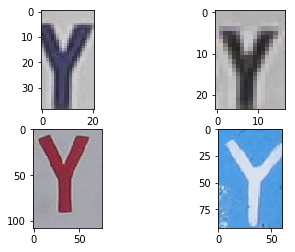

In [10]:
#展示部分数据集图片效果：
for i in range(0, 4):
    set_path = 'E:/Img/Sample035/img035-0002'+str(i)+'.png'
    to_show_img = Image.open(set_path)
    #plt.subplot(221)等形式变换
    plt.subplot(22*10+i+1)
    plt.imshow(to_show_img)



In [15]:
print("train_A:")
print(train_A.shape)
print(train_A)
print("label_A:")
print(label_A.shape)
print(label_A)




train_A:
(3, 1024)
[[0.62745098 0.62745098 0.63137255 ... 0.41960784 0.42745098 0.34901961]
 [0.58823529 0.59607843 0.6        ... 0.40392157 0.57254902 0.56470588]
 [0.62745098 0.64705882 0.6627451  ... 0.83529412 0.81176471 0.80392157]]
label_A:
(3,)
[0 0 0]


In [16]:
#也可以查看全部数组信息：
import sys
np.set_printoptions(threshold = sys.maxsize)
print(train_A)

[[0.62745098 0.62745098 0.63137255 0.64705882 0.63921569 0.57647059
  0.64705882 0.65098039 0.65882353 0.64313725 0.62745098 0.62352941
  0.65882353 0.65098039 0.60392157 0.65882353 0.62745098 0.64313725
  0.66666667 0.6        0.63529412 0.64313725 0.61176471 0.63137255
  0.63529412 0.64313725 0.63921569 0.63529412 0.64705882 0.65098039
  0.65490196 0.63529412 0.63137255 0.63529412 0.63529412 0.64313725
  0.65490196 0.65098039 0.63921569 0.65490196 0.64705882 0.65882353
  0.56470588 0.14509804 0.14117647 0.1372549  0.1372549  0.15294118
  0.18039216 0.13333333 0.14509804 0.1372549  0.15686275 0.15294118
  0.65098039 0.63137255 0.63137255 0.64705882 0.63529412 0.62745098
  0.62352941 0.63921569 0.63137255 0.61568627 0.64705882 0.62745098
  0.63137255 0.63529412 0.65098039 0.63529412 0.64705882 0.63137255
  0.64705882 0.63529412 0.09411765 0.1372549  0.13333333 0.1254902
  0.1372549  0.12941176 0.15294118 0.14117647 0.13333333 0.14901961
  0.14509804 0.13333333 0.22352941 0.61568627 0.6

In [17]:
#接下来的一个函数用到了glob模块，首先引入
import glob

In [20]:
#以上读取文件方式仅仅只包含一个文件夹中读取，现需要从多个文件夹中读取多张图片，新建函数如下：

def read_all_data(item):
    '''
    这是一个从多个文件夹中读取多个文件的函数
    
    参数：
    item -- 希望从每个文件夹中读取文件的个数，item个数可以超过原文件中实际文件个数，函数中做了象关处理
    
    返回值：
    train2 -- 二维数组，（读取的所有文件数， 1024），其中1024 = 32*32， 是图片文件ravel()而成
    test2 --  一维数组，（读取的所有文件数， ） 内容为对应测试图片的标签值
    
    '''
    
    #此列表用来存储实际文件夹中文件数少于item的文件夹列表
    loss_file = []
    #for循环将要读取的52个文件夹中文件少于item的文件夹名依次append到loss_file中
    for i in range(0, 52):   
        path = 'E:/Img/Sample0'+str(11+i)+'/*.png'
        file_num =  glob.glob(path)
        if len(file_num) < item:
            loss_file.append(i)
    #print(loss_file)
    #建立临时的（每个文件夹中）读取存放数据
    train = [None]*52
    test  = [None]*52
    
    #整合了所有文件夹数据的列表
    train2 = []
    test2 = []
    
    #供loss_file索引用，查看文件个数不足的文件夹名称
    j =0 
        
    for i in range(0, 52):
        #print(i)
        #print(loss_file[j])
        #print(type(loss_file[j]))
        #y = y.astype(np.int64)
        #判断条件是：if 第i个文件夹（此中其实用了数字代表文件夹名）等与loos_file中的文件夹序列名，说明第i个
        #文件夹文件个数少于item，则真正取文件时候依据文件夹真实文件个数读取
        if i == loss_file[j]:
            j +=1
            path = 'E:/Img/Sample0'+str(11+i)+'/*.png'
            
            #用glob.glob()查看文件夹中对应文件个数实际值
            file_num =  glob.glob(path)
            #len() - 1 是因为读取从下标0开始
            item = len(file_num)-1
       
        #print(item)
        
        #调用上面第一个函数，读取一个文件夹中文件
        train[i], test[i] = readImage(11+i, item)
        #test[i] = tf.one_hot(test[i], depth = 52)
        if i ==0:
            train2=train[i]
            test2=test[i]
        if i>0 :
            
            #用numpy的concatenate( (A, B), axis=)来实现从每个文件夹中读取文件的连接，
            #即将所有文件夹中读取到的文件个数连成一个numpy数组中
            train2 = np.concatenate((train[i], train2), axis = 0)
            test2 = np.concatenate((test[i], test2), axis = 0)
        #print(np.array(train2).shape)
        
        
    return train2, test2

In [21]:
#读取训练集、标签：
train_X, train_Y = read_all_data(50)

In [22]:
#查看训练集shape
print(np.array(train_X).shape)
print(np.array(train_Y).shape)


(2048, 1024)
(2048,)


In [23]:
#未打乱前标签形式：
print(train_Y)

[51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51 51 51 51 51 51 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49
 49 49 49 49 49 49 49 49 49 49 49 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 47 47 47
 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47
 47 47 47 47 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46
 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 45 45 45 45 45
 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45
 45 45 45 45 45 45 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44
 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 43 43 43 43 43 43 43
 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43
 43 43 43 43 42 42 42 42 42 42 42 42 42 42 42 42 42

In [24]:
#在将训练集投入网络之前，为了更好的拟合，首先需要打乱训练集，用以下方式打乱
#只需要设置相同的随机数种子即可 ： 
np.random.seed(110)
np.random.shuffle(train_X)
np.random.seed(110)
np.random.shuffle(train_Y)
tf.random.set_seed(110)

In [25]:
#打乱标签形式： 可用切割方式查看部分  
#like :  train_Y[10:20]
print(train_Y)

[ 4 28 25 26 14  6 42  5  6 10 10  2  1  6 51 35  6 34 13 10  5  5 10 36
 42 10 31  2  3 27 14 39 10 15 40 11  6 34 21 38 15  4 37 38 45 18 12  2
  0  9  0 38 42 34 12 35 30 38  0  4  9 20 43 15  5 45 25 41 21  0  8  4
 33 18  3 18 27 11 40 20 51 39 20 32 42 25 31 50 25 44  4 16  9 18 18 35
 26  3 48  9 46 48 26 29  1 24 12 18 28  4  8  9 34 16 47 19 17 17  2 42
 34  2 19 29  2 48  9 14 21 20 24 46 49 46 29 25 41 45 31 18  1 17 43 17
 32 50 31 42  0 39 32 50 25  0 17 30 32  2 37  7 19 18  6 38 43  9  1  1
 38 42 40 20  5 11  7  7 17 25  0 17  8 40 29  9 30 34 33 35  0 48 44 15
 34 30 45 47  4  5 50 44 34  8  2  7  0 16 32 10 51 40  7  4 44  7  8 15
 39 27 43 30 48  1 36  3 45 49 25 11 50  3 15 48 19 23  1 40 28 46 14 27
 12 22  1  5 40 29 16 50 13 27 47  8  7  9  0  9 34 41 45 10 32 43 22 15
 10 36 17  7 13 43 10  1 22 32 24 34  4  5 14  3 19 50 31  4 14 18 10 32
 42 42 21 47  5 50 12 18 48 12 39 10  2 34  8 18 31 10 29 27 34  2 35 32
 14 45 38 49 15 23 50 43 21 50 29 28 35 13 15 21 12

In [26]:
#稍后会用到os模块
import os

我所选用的是keras的搭建网络形式， 用tensorflow的kerasAPI实现对keras的引用:
<img src="./net.png" style="width:600px;height:300px;">

In [27]:
model = tf.keras.models.Sequential([
    
    #定义输入层：1024
    tf.keras.Input(shape=(1024,)),
    #第一层 128个结点 relu = max(0, z)
    tf.keras.layers.Dense(128, activation="relu"),
    #第二层 128个结点
    tf.keras.layers.Dense(128, activation="relu"),
    #输出层 52 个分类，所以有52个结点 ： 26 * 2 = 52，用softmax激活函数
    #  t = e^Z (z为第L层的未激活前值)
    #  A[L] = t / (np.sum(t))
    #对应softmax的损失函数为：-y*np.log(y^)
    tf.keras.layers.Dense(52, activation="softmax")
]) 

'''
此部分为了实现断点续训，具体操作为：定义一个文件路径，
第一次训练的时候将所训练的参数存贮到对应路径，在后面训练时候只需要读取相应文件，接着训练参数即可
'''
check_point_path = 'E:/Img/mnist.ckpt'
if os.path.exists(check_point_path + '.index'):
    print('----------加载模型---------')
    model.load_weights(check_point_path)

#回调函数，作用于断点续训，在model.fit中可以指定callbacks= cp_callback实现回调
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)
#指定优化方式： 有L2正则化、随即失活（dropout）、adam等，
model.compile(
    optimizer='adam',
    #指定loss经过概率分布 false
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    #指定输出以类热码形式给出：[即每一种概率分布率]
    metrics=['sparse_categorical_crossentropy'])

#categorical_crossentropy
#sparse_categorical_crossentropy
#投入网络开始训练，指定返回至history，用history可以后续查看训练的一些详细信息

#  此处给出的测试集方式为从训练集中分割百分比方式， 所以前面并没有直接给出测试集：
#batch_size : 打包成每组64 个 然后投入网络
#validation_split = 0.25 指定训练集的0.25为测试集部分
#epochs 迭代次数
#validation_freq = 2 每迭代两次送入测试集检验一次识别率
#
history = model.fit(train_X, train_Y, batch_size=64, epochs=100, verbose=1,validation_split = 0.25, validation_freq = 2, callbacks=[cp_callback])

model.summary()

----------加载模型---------
Train on 1536 samples, validate on 512 samples
Epoch 1/100
1536/1536 [==============================] - 1s 824us/sample - loss: 0.0365 - sparse_categorical_crossentropy: 0.0365
Epoch 2/100
1536/1536 [==============================] - 1s 482us/sample - loss: 0.0247 - sparse_categorical_crossentropy: 0.0247 - val_loss: 3.3730 - val_sparse_categorical_crossentropy: 3.3730
Epoch 3/100
1536/1536 [==============================] - 0s 68us/sample - loss: 0.0202 - sparse_categorical_crossentropy: 0.0202
Epoch 4/100
1536/1536 [==============================] - 0s 73us/sample - loss: 0.0171 - sparse_categorical_crossentropy: 0.0171 - val_loss: 3.4320 - val_sparse_categorical_crossentropy: 3.4320
Epoch 5/100
1536/1536 [==============================] - 0s 61us/sample - loss: 0.0162 - sparse_categorical_crossentropy: 0.0162
Epoch 6/100
1536/1536 [==============================] - 0s 62us/sample - loss: 0.0161 - sparse_categorical_crossentropy: 0.0161 - val_loss: 3.4483 - va

1536/1536 [==============================] - 0s 99us/sample - loss: 0.0089 - sparse_categorical_crossentropy: 0.0089 - val_loss: 3.6434 - val_sparse_categorical_crossentropy: 3.6434
Epoch 33/100
1536/1536 [==============================] - 0s 137us/sample - loss: 0.0087 - sparse_categorical_crossentropy: 0.0087
Epoch 34/100
1536/1536 [==============================] - 0s 113us/sample - loss: 0.0085 - sparse_categorical_crossentropy: 0.0085 - val_loss: 3.6907 - val_sparse_categorical_crossentropy: 3.6907
Epoch 35/100
1536/1536 [==============================] - 0s 50us/sample - loss: 0.0082 - sparse_categorical_crossentropy: 0.0082
Epoch 36/100
1536/1536 [==============================] - 0s 62us/sample - loss: 0.0081 - sparse_categorical_crossentropy: 0.0081 - val_loss: 3.7043 - val_sparse_categorical_crossentropy: 3.7043
Epoch 37/100
1536/1536 [==============================] - 0s 49us/sample - loss: 0.0080 - sparse_categorical_crossentropy: 0.0080
Epoch 38/100
1536/1536 [============

Epoch 64/100
1536/1536 [==============================] - 0s 83us/sample - loss: 0.0050 - sparse_categorical_crossentropy: 0.0050 - val_loss: 3.9120 - val_sparse_categorical_crossentropy: 3.9120
Epoch 65/100
1536/1536 [==============================] - 0s 62us/sample - loss: 0.0048 - sparse_categorical_crossentropy: 0.0048
Epoch 66/100
1536/1536 [==============================] - 0s 77us/sample - loss: 0.0047 - sparse_categorical_crossentropy: 0.0047 - val_loss: 3.9198 - val_sparse_categorical_crossentropy: 3.9198
Epoch 67/100
1536/1536 [==============================] - 0s 52us/sample - loss: 0.0049 - sparse_categorical_crossentropy: 0.0049
Epoch 68/100
1536/1536 [==============================] - 0s 69us/sample - loss: 0.0048 - sparse_categorical_crossentropy: 0.0048 - val_loss: 3.9429 - val_sparse_categorical_crossentropy: 3.9429
Epoch 69/100
1536/1536 [==============================] - 0s 58us/sample - loss: 0.0045 - sparse_categorical_crossentropy: 0.0045
Epoch 70/100
1536/1536 [=

Epoch 96/100
1536/1536 [==============================] - 0s 76us/sample - loss: 0.0030 - sparse_categorical_crossentropy: 0.0030 - val_loss: 4.1294 - val_sparse_categorical_crossentropy: 4.1294
Epoch 97/100
1536/1536 [==============================] - 0s 60us/sample - loss: 0.0030 - sparse_categorical_crossentropy: 0.0030
Epoch 98/100
1536/1536 [==============================] - 0s 64us/sample - loss: 0.0029 - sparse_categorical_crossentropy: 0.0029 - val_loss: 4.1185 - val_sparse_categorical_crossentropy: 4.1185
Epoch 99/100
1536/1536 [==============================] - 0s 65us/sample - loss: 0.0028 - sparse_categorical_crossentropy: 0.0028
Epoch 100/100
1536/1536 [==============================] - 0s 71us/sample - loss: 0.0028 - sparse_categorical_crossentropy: 0.0028 - val_loss: 4.1362 - val_sparse_categorical_crossentropy: 4.1362
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
de

In [28]:
#依据刚才返回的history保留的参数，查看或者打印训练过程的一些loss曲线图：
#损失函数值变换
loss = history.history['loss']
#测试机损失函数值变化
val_loss =  history.history['val_loss']

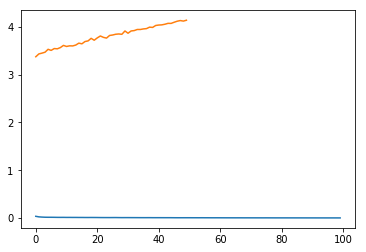

In [29]:
import matplotlib.pyplot as plt
% matplotlib inline
#打印曲线图：
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label='val_loss')

####val_loss短与迭代次数和每迭代多少次计算一次有关

In [30]:
#接下来实现预测：首先需要模型复现：
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(1024,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(52, activation="softmax")
]) 
#加载参数文件夹：
model.load_weights(check_point_path)

In [86]:
#加载需要预测的图片
test_path = 'E:/Img/Sample041/img041-00050.png'
img = Image.open(test_path)
img = img.resize((32, 32))
img = np.array(img.convert('L'))
img = img / 255.0
x_predict = img.ravel()

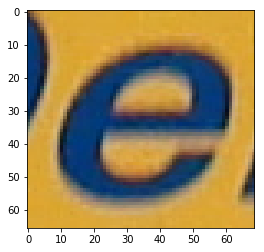

In [87]:
#查看图片
file_path_to_test = test_path
to_show_img = Image.open(file_path_to_test)
plt.imshow(to_show_img)

In [88]:
#规整shape，然后直接用kerase的模型的predict()函数实现依次前向传播
x_predict = np.reshape(x_predict, (1,1024))

In [89]:
#实现训练后的前向传播
result = model.predict(x_predict)

In [90]:
#查看以下传播结果
print(result)

[[1.5250669e-09 2.1894996e-06 4.3810209e-07 7.1268114e-10 5.8107471e-06
  1.1520001e-09 9.3208400e-06 3.1939087e-11 7.7804023e-13 3.2232820e-16
  1.1153099e-12 1.1687172e-11 1.1993039e-12 1.7344692e-05 6.7047101e-09
  2.0953948e-08 1.4331918e-06 7.4401707e-10 1.1389568e-09 7.4885532e-16
  1.3448545e-07 7.8182551e-11 5.6250894e-07 1.7281611e-19 1.2308147e-18
  3.3873109e-17 1.3479942e-03 4.0594867e-05 4.6654382e-08 1.6768234e-07
  7.1470726e-01 1.0560741e-10 2.8954776e-08 6.7333463e-07 6.5505197e-09
  1.0288997e-15 1.0879471e-09 6.8831869e-17 9.3227513e-08 2.1443751e-03
  2.8051949e-01 3.6397396e-11 9.3475713e-12 3.7571470e-11 1.1993437e-03
  2.3400564e-09 2.5389970e-06 2.5363116e-09 4.2941029e-08 7.4744454e-11
  9.0536874e-16 5.5663586e-12]]


In [91]:
#将 [[]] 形式转化为（52，）利于操作
result = np.reshape(result, (52,))
print(result.shape)
print(result)

(52,)
[1.5250669e-09 2.1894996e-06 4.3810209e-07 7.1268114e-10 5.8107471e-06
 1.1520001e-09 9.3208400e-06 3.1939087e-11 7.7804023e-13 3.2232820e-16
 1.1153099e-12 1.1687172e-11 1.1993039e-12 1.7344692e-05 6.7047101e-09
 2.0953948e-08 1.4331918e-06 7.4401707e-10 1.1389568e-09 7.4885532e-16
 1.3448545e-07 7.8182551e-11 5.6250894e-07 1.7281611e-19 1.2308147e-18
 3.3873109e-17 1.3479942e-03 4.0594867e-05 4.6654382e-08 1.6768234e-07
 7.1470726e-01 1.0560741e-10 2.8954776e-08 6.7333463e-07 6.5505197e-09
 1.0288997e-15 1.0879471e-09 6.8831869e-17 9.3227513e-08 2.1443751e-03
 2.8051949e-01 3.6397396e-11 9.3475713e-12 3.7571470e-11 1.1993437e-03
 2.3400564e-09 2.5389970e-06 2.5363116e-09 4.2941029e-08 7.4744454e-11
 9.0536874e-16 5.5663586e-12]


In [92]:
#此函数逐个遍历输出结果，对于大概率的输出结果操作，假定大=大概率即识别结果
def processPredict(result):
    
    print(result.shape)
    for i, enum in enumerate(result):
        #print(enum)
        if enum > 0.5 :
            return i
    
    return -1

In [93]:
#d定义一个网络输出和字母间的连接：
label_ = {'0':'A', '1':'B', '2':'C', '3':'D', '4':'E', '5':'F', '6':'G', '7':'H', '8':'I', '9':'J',
     '10':'K', '11':'L', '12':'M', '13':'N', '14':'O', '15':'P', '16':'Q', '17':'R', '18':'S', '19':'T',
     '20':'U', '21':'V', '22':'W', '23':'X', '24':'Y', '25':'Z', '26':'a', '27':'b', '28':'c', '29':'d',
     '30':'e', '31':'f', '32':'g', '33':'h', '34':'i', '35':'j', '36':'k', '37':'l', '38':'m', '39':'n',
     '40':'o', '41':'p', '42':'q', '43':'r', '44':'s', '45':'t', '46':'u', '47':'v', '48':'w', '49':'x',
     '50':'y', '51':'z','-1':'识别错误'}

In [94]:
#调用处理函数，返回的是输出0到51 或者-1的一个数，然后用label_查看识别的字母
c = processPredict(result)

(52,)


In [95]:
#实现返回的是字母而不是一个数组，利于查看
def view_Pre(num):
    print(label_[str(num)])

In [96]:
#输出识别结果：   更换图片时候 只需要更改图片路径， 然后依次运行更改路径后以下模块实现预测值输出：
view_Pre(c)

e
